In this notebook I will analyze the career outcomes of enlisted soldiers who left the army at different times.

Data comes from the link below:
https://lehd.ces.census.gov/data/veo_experimental.html

In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns

pay_grade = pd.read_csv('veop.csv')

Need to filter the data I want to analyze out of dataset

In [3]:
paygrade_rows = pay_grade[16:]
paygrade_clean = paygrade_rows[['cohort', 'paygrade','y1_emp','y1_nonemp']]
paygrade_clean = paygrade_clean.reset_index(drop=True)
print(paygrade_clean.head(25))
#print(paygrade_clean['y1_emp'][1])

    cohort paygrade  y1_emp  y1_nonemp
0     2000       E1    2075       1962
1     2000       E2    1305       1279
2     2000       E3    2485       2323
3     2000       E4   21180      15180
4     2000       E5   11160       6213
5     2000       E6    4872       2614
6     2000    E7-E9    8188       3648
7     2002       E1    2311       2505
8     2002       E2    1379       1604
9     2002       E3    2132       2561
10    2002       E4   15440      16560
11    2002       E5    6845       6295
12    2002       E6    2972       1789
13    2002    E7-E9    5389       2284
14    2004       E1    1852       1856
15    2004       E2    1019       1008
16    2004       E3    2022       1962
17    2004       E4   20060      17030
18    2004       E5   11760       8427
19    2004       E6    4286       2382
20    2004    E7-E9    9459       3547
21    2006       E1    1525       1404
22    2006       E2     581        656
23    2006       E3    1413       1455
24    2006       E4   157

Need to aggregate the data for each paygrade into readable format.

Why not a dictionary?

In [4]:
paygrade_dict = {}

for i in range(len(paygrade_clean.cohort)):
    if paygrade_clean['paygrade'][i] not in paygrade_dict.keys():
        paygrade_dict[paygrade_clean['paygrade'][i]] = float(paygrade_clean['y1_emp'][i])
    else:
        paygrade_dict[paygrade_clean['paygrade'][i]] += float(paygrade_clean['y1_emp'][i])

print(list(paygrade_dict.keys()))        

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7-E9']


Turns out a dictionary worked!

C:\Users\joeyc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


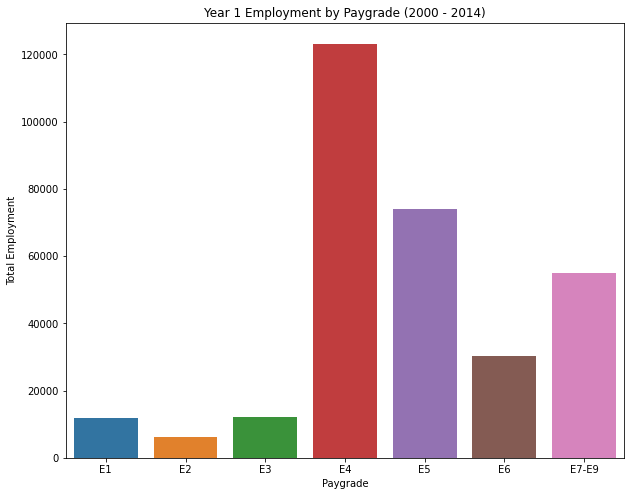

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(10,8))
sns.barplot(list(paygrade_dict.keys()), list(paygrade_dict.values()), ci=None)
plt.title('Year 1 Employment by Paygrade (2000 - 2014)')
plt.xlabel('Paygrade')
plt.ylabel('Total Employment')
plt.show()
#plt.savefig('Bar - Y1 employment by paygrade.jpeg')
plt.clf()

Now lets trying employment outcomes change over time.

In [6]:
cohorts = []
pay_grades = []
for i in range(len(paygrade_clean.cohort)):
    if paygrade_clean['cohort'][i] not in cohorts:
        cohorts.append(paygrade_clean['cohort'][i])

for i in range(len(paygrade_clean.cohort)):
    if paygrade_clean['paygrade'][i] not in pay_grades:
        pay_grades.append(paygrade_clean['paygrade'][i])

paygrade_dict = {}

#for i in range(len(paygrade_clean.cohort)):
#    if paygrade_clean['cohort'][i] not in paygrade_dict.keys():
#        paygrade_dict[paygrade_clean['cohort'][i]] = {paygrade_clean['paygrade'][i]: paygrade_clean['y1_emp'][i]}
#    else:
#        paygrade_dict[paygrade_clean['paygrade'][i]] += float(paygrade_clean['y1_emp'][i])

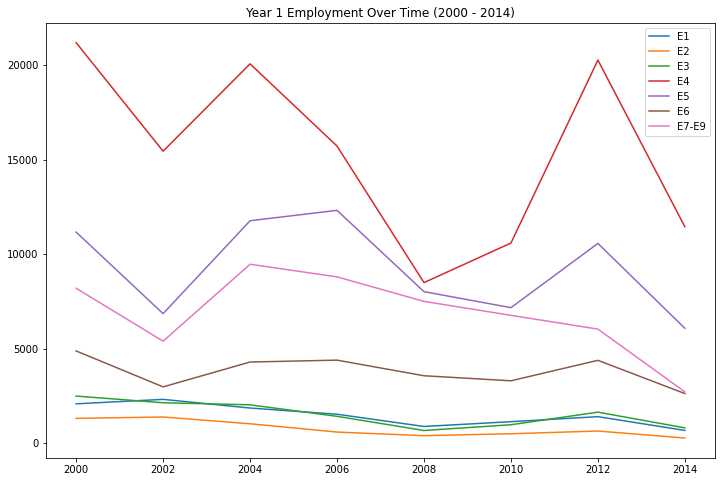

<Figure size 432x288 with 0 Axes>

In [7]:
#print(paygrade_clean[paygrade_clean['paygrade'] == 'E1'].y1_emp)
plt.figure(figsize=(12,8))
for grade in pay_grades:
    plt.plot(cohorts, paygrade_clean[paygrade_clean['paygrade'] == grade].y1_emp, label = grade)
plt.legend(loc=0)
plt.title('Year 1 Employment Over Time (2000 - 2014)')
plt.show()
#plt.savefig('Line - Y1 employment by paygrade over time.jpeg')
plt.clf()


I want to visualize the performance of each grade at finding employment after the Army. I will find the ratio of y1_emp over y1_nonemp.

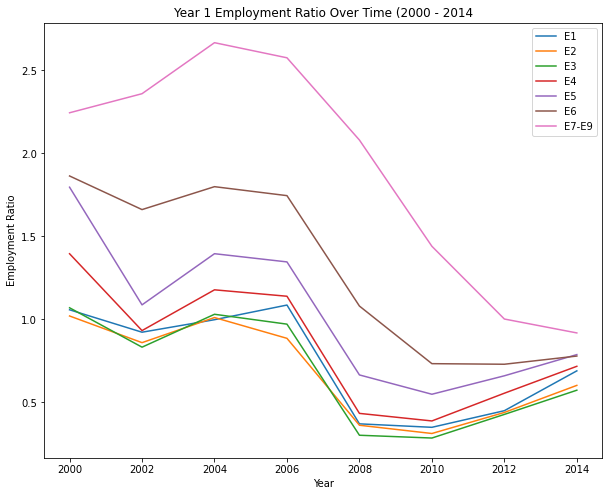

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(10,8))
for grade in pay_grades:
    plt.plot(cohorts, (paygrade_clean[paygrade_clean['paygrade'] == grade].y1_emp / paygrade_clean[paygrade_clean['paygrade'] == grade].y1_nonemp), label = grade)
plt.legend()
plt.title('Year 1 Employment Ratio Over Time (2000 - 2014')
plt.xlabel('Year')
plt.ylabel('Employment Ratio')
plt.show()
plt.clf()

This plot shows a very different story compared to the earlier visualizations. The higher the rank you are the more likely that you are to find employment your first year after leaving the Army. This observation holds generally true until 2014 when E5 paygrades surpass E6 in employment success. Interestingly, in 2014 (where the data ends) it seems like the 1 year employment for all paygrades is starting to converge. In fact, in 2014 not a single paygrade had year 1 employment greater than 1.

In [9]:
earnings_df = paygrade_rows[['cohort','paygrade','y1_p25_earnings', 'y1_p50_earnings','y1_p75_earnings']]
earnings_df.reset_index(inplace=True)
earnings_df = earnings_df[['cohort','paygrade','y1_p25_earnings', 'y1_p50_earnings','y1_p75_earnings']]
print(earnings_df.head(10))
#print(earnings_df.iloc[0])

   cohort paygrade  y1_p25_earnings  y1_p50_earnings  y1_p75_earnings
0    2000       E1            19450            26630            36400
1    2000       E2            18660            24700            34370
2    2000       E3            18960            26000            34880
3    2000       E4            21530            30180            40590
4    2000       E5            27300            38610            52260
5    2000       E6            30190            41770            57370
6    2000    E7-E9            33110            44860            60850
7    2002       E1            17970            24880            34600
8    2002       E2            17700            24430            34720
9    2002       E3            17840            24380            33210


I want to make some observations about average earnings for army veterans over the time frame of this dataset. 

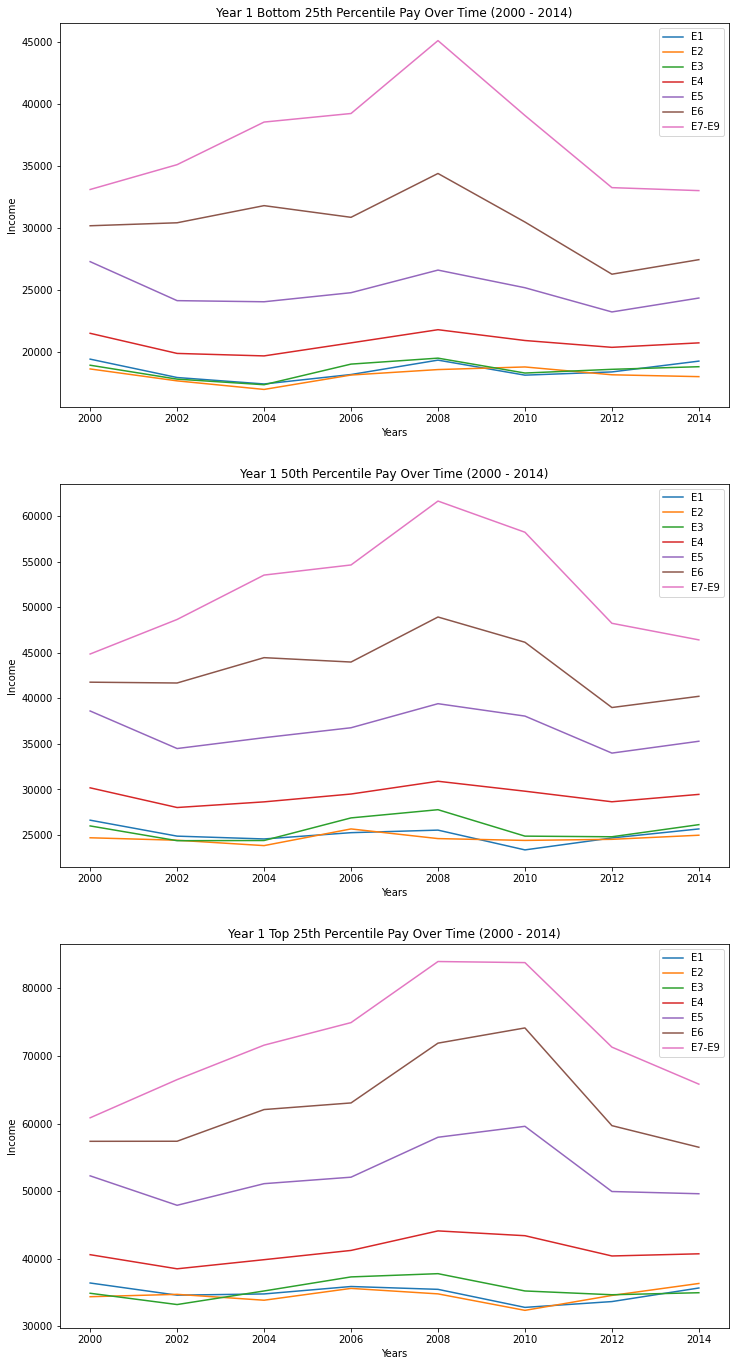

In [10]:
plt.figure(figsize=(12,24))

plt.subplot(3,1,1)
for grade in pay_grades:
    plt.plot(cohorts, earnings_df[earnings_df['paygrade'] == grade].y1_p25_earnings, label = grade)
plt.legend(loc=0)
plt.title('Year 1 Bottom 25th Percentile Pay Over Time (2000 - 2014)')
plt.xlabel('Years')
plt.ylabel('Income')
plt.subplot(3,1,2)
for grade in pay_grades:
    plt.plot(cohorts, earnings_df[earnings_df['paygrade'] == grade].y1_p50_earnings, label = grade)
plt.legend(loc=0)
plt.title('Year 1 50th Percentile Pay Over Time (2000 - 2014)')
plt.xlabel('Years')
plt.ylabel('Income')
plt.subplot(3,1,3)
for grade in pay_grades:
    plt.plot(cohorts, earnings_df[earnings_df['paygrade'] == grade].y1_p75_earnings, label = grade)
plt.legend(loc=0)
plt.title('Year 1 Top 25th Percentile Pay Over Time (2000 - 2014)')
plt.xlabel('Years')
plt.ylabel('Income')
plt.show()
